# RQ7

In [2]:
import pandas as pd

Let's only import the columns we need, so we can keep memory usage to a minimum

In [3]:
df = pd.read_csv("data/steam_reviews.csv", 
                 usecols = ['review_id', 'votes_funny', 'weighted_vote_score'], 
                 header = 'infer')

## Weighted Vote Score

We want to know what's the probability that a review has a *WVS* of at least 0.5.

In order to do so, let's take a first look into how these scores are distributed.

In [4]:
df['weighted_vote_score'].describe()

count    2.174737e+07
mean     1.654424e-01
std      2.434006e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.827586e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

The distribution has a mean of about 0.16, and about 3/4 of the votes are below 0.5. 

This tells us that we should expect a low figure for $\mathcal{P}(score \geq 0.5)$

In order to get a better grasp of this data, we should plot an histogram of the values.

(array([1.4771085e+07, 5.2000000e+02, 1.7150000e+03, 4.1600000e+03,
        8.9340000e+03, 1.7806000e+04, 3.6615000e+04, 8.0479000e+04,
        2.3005300e+05, 1.7133780e+06, 4.1125020e+06, 4.0800400e+05,
        1.3281000e+05, 7.2766000e+04, 5.0619000e+04, 3.7894000e+04,
        2.9022000e+04, 2.1506000e+04, 1.3169000e+04, 4.3340000e+03]),
 array([0.        , 0.04979934, 0.09959868, 0.14939801, 0.19919735,
        0.24899669, 0.29879603, 0.34859537, 0.3983947 , 0.44819404,
        0.49799338, 0.54779272, 0.59759206, 0.64739139, 0.69719073,
        0.74699007, 0.79678941, 0.84658875, 0.89638808, 0.94618742,
        0.99598676]),
 <a list of 20 Patch objects>)

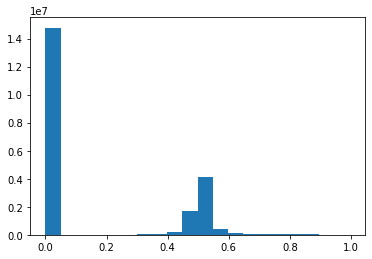

In [5]:
import matplotlib.pyplot as plt

n_bins = 20

plt.hist(df['weighted_vote_score'], bins = n_bins)

The vast majority of reviews have a Weighted Vote Score of exactly 0, so instead on working with the entire dataset, let's only focus on those reviews which have a non-zero score.

In [14]:
wvs = df[df['weighted_vote_score'] > 0]

wvs['weighted_vote_score'].describe()

count    6.976357e+06
mean     5.157330e-01
std      6.343698e-02
min      8.186612e-03
25%      4.907975e-01
50%      5.215110e-01
75%      5.238096e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

In [15]:
wvs['weighted_vote_score'].median()

0.5215110182762146

Only about 1/3 of the reviews have a non-zero score. The mean now is very close to 0.5 and the distribution is symmetric about 0.52; as we can visualize from the updated histogram the scores seem normally distributed, although the right tail is heavier than the left one: reviews tend to have a score higher than 0.5 more likely than lower.

(array([1.02000e+02, 6.42000e+02, 1.94200e+03, 4.63500e+03, 9.60200e+03,
        1.92670e+04, 3.90880e+04, 8.92700e+04, 2.61580e+05, 2.05507e+06,
        3.77230e+06, 3.77700e+05, 1.20676e+05, 7.08080e+04, 4.95190e+04,
        3.71480e+04, 2.86300e+04, 2.11590e+04, 1.29500e+04, 4.26900e+03]),
 array([0.00818661, 0.05757662, 0.10696663, 0.15635663, 0.20574664,
        0.25513665, 0.30452666, 0.35391666, 0.40330667, 0.45269668,
        0.50208669, 0.55147669, 0.6008667 , 0.65025671, 0.69964672,
        0.74903672, 0.79842673, 0.84781674, 0.89720674, 0.94659675,
        0.99598676]),
 <a list of 20 Patch objects>)

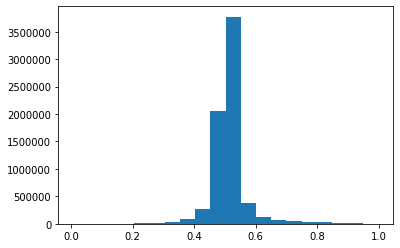

In [7]:
plt.hist(wvs['weighted_vote_score'], bins = n_bins)

To estimate the probability of $\mathcal{P}(score \geq 0.5)$ we can sum up the number of elements contained in each bin in the interval $[0.5, 1.0]$ and then divide the value we get by the total number of binned elements.

This is easily done by operating directly on the dataset.

In [8]:
prob_wvs = wvs[wvs['weighted_vote_score'] >= 0.5]['weighted_vote_score'].count() / wvs['weighted_vote_score'].count()

print(f"{100 * prob_wvs:.2f}%")

68.58%


About 2/3 of the reviews have a Weighted Vote Score of at least 0.5.

On ther other hand, by considering the original dataset we would have gotten only about 1/5 of the reviews.

In [9]:
prob_wvs_zero = df[df['weighted_vote_score'] >= 0.5]['weighted_vote_score'].count() / df['weighted_vote_score'].count()

print(f"{100 * prob_wvs_zero:.2f}%")

22.00%


======== may remove this part =========

Let's take a look back at the summary for this data:

In [10]:
wvs['weighted_vote_score'].describe()

count    6.976357e+06
mean     5.157330e-01
std      6.343698e-02
min      8.186612e-03
25%      4.907975e-01
50%      5.215110e-01
75%      5.238096e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

To take a different approach, if we assume the Weighted Vote Scores distribution is well modelled by a Normal distribution with parameters

$WVS \sim \mathcal{N}(\mu = 0.52,\ \sigma^2 = (0.063)^2)$

then we can compute $\mathcal{P}(WVS \geq 0.5)$ using the Standard normal table.

$Z = \frac{WVS - \mu}{\sigma}$

....

======== may remove this part =========

## Let's take a deeper look into these reviews

We want to study the correlation between a review having a *WVS* bigger than or equal to 0.5 and it being rated as 'Funny'.

First, let's compute the probability of a review having $WVS \geq 0.5$ and at least one 'Funny' vote:

$\mathcal{P}(WVS \geq 0.5\: \text{and}\: funny \geq 1)$

Just like before, we can filter the dataset and then divide the number of reviews in the filtered dataset by the total number of reviews.

In [75]:
wvs_funny = df[(df['weighted_vote_score'] >= 0.5) & df['votes_funny'] > 0]['review_id']

prob_wvs_funny = wvs_funny.count() / wvs.count()

print(f"{100 * prob_wvs_funny:.2f}%")

12.19%


### Are these two events independent?

If the probability of a review having $WVS \geq 0.5$ and the probability of it having been rated as 'Funny' by at least one user are independent, then we expect

$\mathcal{P}(WVS \geq 0.5\: \text{and}\: funny \geq 1) = \mathcal{P}(WVS \geq 0.5)\cdot\mathcal{P}(funny \geq 1)$

In order to check if this equality holds, let's compute $\mathcal{P}(funny \geq 1)$.

We will filter these reviews out of the dataset which contains only rewiews with non-zero *WVS*'s.

In [91]:
prob_funny = wvs[wvs['votes_funny'] >= 1]['votes_funny'].count() / wvs['votes_funny'].count()

Let's now compute the difference between the probability of the intersection of these two events, and the product of the probabilities of the two single events.

In [94]:
abs(prob_wvs_funny - prob_wvs * prob_funny)

0.05262696050298986

The difference is too large to be negligible: the two events can't be considered independent.